# Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from pandas.plotting import scatter_matrix
from seaborn import scatterplot

## Data Import

In [84]:
df = pd.read_csv('data/waveform.data', header=None)
df_original = df.copy()


# Initial Dataset Exploration

In [85]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [86]:
num_features = df.shape[1]
df.shape

(5000, 22)

In [87]:
# useful info about ranges, etc.
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [88]:
# names of the columns (feature names)
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

In [90]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
dtype: object

In [91]:
# feature 21 is label
df[21].unique()

array([2, 1, 0])

In [92]:
# percentage of each class
(df[21].value_counts())/5000

2    0.3392
0    0.3314
1    0.3294
Name: 21, dtype: float64

# Split the Dataset
- Split the datset into training and test sets.
- Further split the training and test set into the input features X and the label y.

In [93]:
df = df_original.copy()

In [94]:
def split_train_test(df, train_size):
  # split the data into training and test set
  train_df = df.sample(frac=train_size, random_state=2)
  test_df = df.drop(train_df.index)
  train_df.reset_index(drop=True, inplace=True)
  test_df.reset_index(drop=True, inplace=True)
  return train_df, test_df

In [95]:
train_df, test_df = split_train_test(df, 0.80)
print(f'{train_df.shape}, {test_df.shape}')

(4000, 22), (1000, 22)


In [96]:
last_feat = num_features-1

train_X = train_df[np.arange(0, last_feat)]
train_Y = train_df[last_feat]

test_X = test_df[np.arange(0, last_feat)]
test_Y = test_df[last_feat]

# Data Exploration

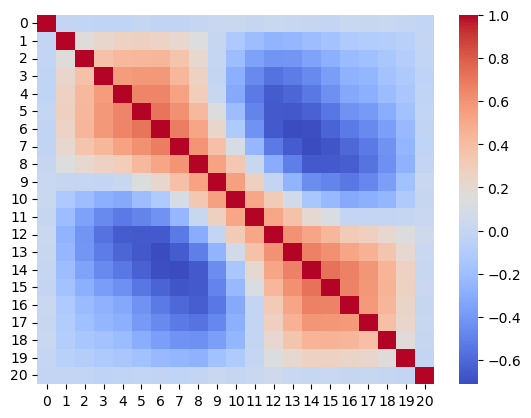

In [15]:
correlations = train_X.corr()
sns.heatmap(correlations, cmap='coolwarm', fmt='.2f')
plt.show()

In [16]:
# get all correlations above 0.65 or below -0.65
sorted_correlations = correlations.unstack().sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1]
print(sorted_correlations.head(10), sorted_correlations.tail(10), sep='\n\n')

15  14    0.721588
14  15    0.721588
5   6     0.718998
6   5     0.718998
7   6     0.684074
6   7     0.684074
13  14    0.671534
14  13    0.671534
16  14    0.669238
14  16    0.669238
dtype: float64

5   13   -0.660541
13  5    -0.660541
15  7    -0.672676
7   15   -0.672676
6   14   -0.704145
14  6    -0.704145
13  6    -0.711551
6   13   -0.711551
7   14   -0.711894
14  7    -0.711894
dtype: float64


- Some features are quite highly correlated.
  - This information is useful as it means PCA will probably work well on this dataset.
  - Even better news as it means we have a higher chance to reduce the curse of dimensionality.
    - Which can strongly affect kNN.

# Standardisation
- Standardise the data using the z-score for each value.

- This is best for kNN as it centers the values around 0.

- Makes it easier to identify outliers.
  - Any example with a value above 3 means it is more than 3 standard deviations away from the mean (outlier?).

In [17]:
def standardize(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    standardized_df = (df - mean) / std
    return standardized_df, mean, std

train_X, train_mean, train_std = standardize(train_X)

test_X_original = test_X.copy()
test_X = (test_X-train_mean)/train_std

print((train_X > 3).sum() + (train_X < -3).sum())

0      7
1      8
2     12
3      3
4      1
5      1
6      1
7      1
8      5
9      5
10     4
11     2
12     1
13     1
14     1
15     1
16     4
17     6
18     7
19    11
20    11
dtype: int64


Text(0, 0.5, 'Z-score for All Examples')

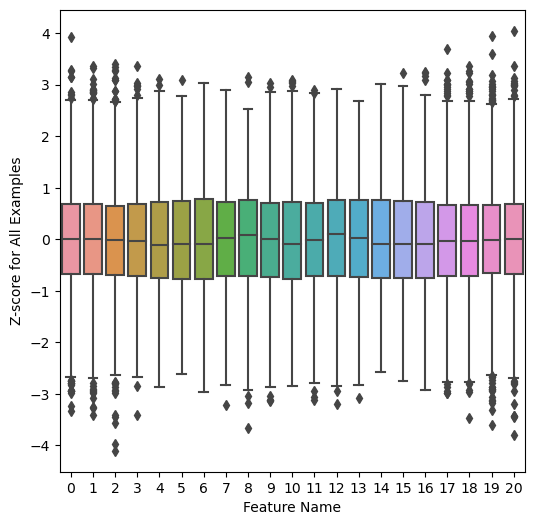

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(train_X)
plt.xlabel('Feature Name')
plt.ylabel('Z-score for All Examples')

We can't conclude much from the above box plot as it shows the outliers for different features.
- An example that is an outlier for feature 1 is likely not for all other 21 features.

So let's combine the z-scores of all examples and divide by the number of features to get a scalar for each example.

-0.5184737042365252
0.5095076290937769


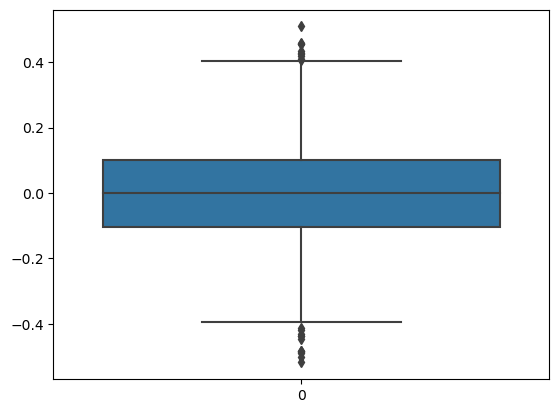

In [19]:
row_sums = train_X.sum(axis=1)
sns.boxplot(row_sums/num_features)

print(min(row_sums/num_features))
print(max(row_sums/num_features))

From this box-plot, we can infer that there are no outliers.
- No example lies more than 0.6 standard deviations away from the mean.

# Initial kNN Implementation

This method simply takes the standardised raw data.

In [97]:
def compute_distance_matrix(X):
    X_size = X.shape[0]
    distance_matrix = np.zeros((X_size, X_size))
    for i in range(X_size):
      distance_matrix[i] = np.linalg.norm(X.iloc[i] - X, axis=1)
    return distance_matrix

In [98]:
distance_matrix = compute_distance_matrix(train_X)
print(f'Distance matrix shape: {distance_matrix.shape}')

Distance matrix shape: (4000, 4000)


In [99]:
def kfold_indices(data, k_folds):
    fold_size = len(data) // k_folds
    indices = np.arange(len(data))
    folds = []
    for i in range(k_folds):
        validation_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        folds.append((train_indices, validation_indices))
    return folds

In [100]:
k_folds = 10
folds = kfold_indices(train_X, k_folds)
print(f"Fold 1 - Train size: {len(folds[0][0])}, Validation size: {len(folds[0][1])}")
print(f"Fold 1 - Train indices: {folds[0][0]}")
print(f"Fold 1 - Validation indices: {folds[0][1]}")

Fold 1 - Train size: 3600, Validation size: 400
Fold 1 - Train indices: [ 400  401  402 ... 3997 3998 3999]
Fold 1 - Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212

In [101]:
def get_neighbors(val_distances_row, train_indices, k):
    # Sort distances to training points and get k smallest
    sorted_indices = np.argsort(val_distances_row[train_indices])[:k]
    # Map back to the training indices
    neighbors_indices = train_indices[sorted_indices]
    return neighbors_indices

In [102]:
def knn_prediction(neighbors_indices, labels):
    # Retrieve the labels of the neighbors
    labels_indices = labels.index[neighbors_indices]
    output_values = labels.loc[labels_indices].values.flatten()
    # Perform majority voting
    prediction = max(set(output_values), key=list(output_values).count)
    return prediction

In [103]:
def knn(val_distances_row, train_indices, k, labels):
    neighbors = get_neighbors(val_distances_row, train_indices, k)
    return knn_prediction(neighbors, labels)

In [104]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / len(actual) * 100.0

In [105]:
actual =    [0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
predicted = [0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
accuracy = accuracy_metric(actual, predicted)
print(f'Accuracy: {accuracy}')

Accuracy: 90.0


In [106]:
def k_folds_cross_validation(train_X, train_Y, distance_matrix, k_folds, k):
    folds = kfold_indices(train_X, k_folds)
    scores = []

    for fold in folds:
        train_indices = fold[0]
        validation_indices = fold[1]

        # Get the sub-matrix of distances for validation vs all data
        validation_distances = distance_matrix[validation_indices, :]

        # Use the algorithm to predict for all validation instances at once
        predicted = []

        for i, _ in enumerate(validation_indices):
            prediction = knn(validation_distances[i, :], train_indices, k, train_Y)
            predicted.append(prediction)

        # Get actual labels for validation data
        actual = train_Y.loc[validation_indices].values

        # Calculate accuracy for the current fold
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)

    return scores

## Let's find the best value of k
We will search for k in the range [1, 100] inclusive.

This includes $\sqrt{n}=\sqrt{4000}\approx63$, which can be used as a base for the best value of k.

We will use 10 folds to calculate the accuracy.

In [107]:
k_folds = 10
k_neighbors = np.arange(1, 101)
accuracy = []

best_k = None
best_accuracy = 0

for k in tqdm(k_neighbors, desc='Finding best k'):
    scores = k_folds_cross_validation(train_X, train_Y, distance_matrix, k_folds, k)
    mean_accuracy = np.mean(scores)
    accuracy.append(mean_accuracy)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

print(f'Best k: {best_k}, Best Accuracy: {best_accuracy}')

Finding best k: 100%|██████████| 100/100 [03:08<00:00,  1.88s/it]

Best k: 70, Best Accuracy: 85.975


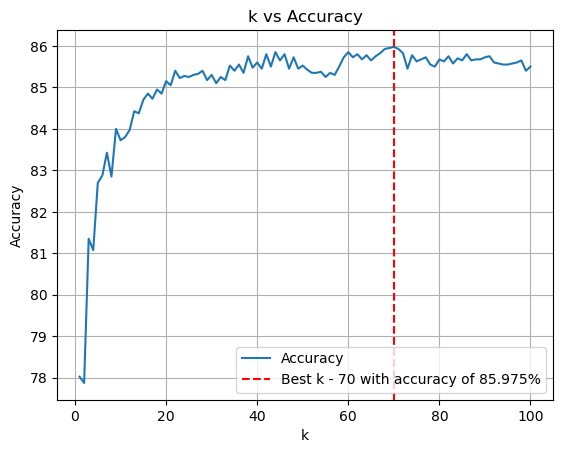

In [108]:
def plot_accuracy(k, accuracy):
    # plt.figure(figsize=(10, 5))
    plt.plot(k, accuracy, label='Accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k vs Accuracy')
    plt.grid()
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k - {best_k} with accuracy of {best_accuracy}%')
    plt.legend()
    plt.show()

plot_accuracy(k_neighbors, accuracy)

# Part 2: Data Reduction


### Step 1 - Remove Outliers
1. Split training set into two random subsets $S_1$ and $S_2$.
2. while $S_1$ and $S_2$ not stabilised:
    - classify $S_1$ with $S_2$ using 1-NN.
    - Remove misclassified instances from $S_1$
    - Classify $S_2$ with new set $S_1$ using 1-NN
    - Remove misclassified instances from $S_2$
3. $S_{cleaned} = S_1 \cup S_2$

In [109]:
def classify_and_remove(S1, S2, distance_matrix, Y):
    train_indices = S2.index.values
    indices_to_drop = []
    for index, _ in S1.iterrows():
        k = 1
        predicted_label = knn(distance_matrix[index], train_indices, k, train_Y)
        actual_label = Y.loc[index]
        if predicted_label != actual_label:
            indices_to_drop.append(index)
    S1.drop(indices_to_drop, inplace=True)
    return S1

def remove_outliers(X, Y, distance_matrix, max_iterations=10):
    S1 = X.sample(frac=0.5)
    S2 = X.drop(S1.index)

    old_S1 = S1.copy()
    old_S2 = S2.copy()
    i = 0
    while i < max_iterations:
        old_S1 = S1.copy()
        old_S2 = S2.copy()

        S1 = classify_and_remove(S1, S2, distance_matrix, Y)
        S2 = classify_and_remove(S2, S1, distance_matrix, Y)

        if S1.index.equals(old_S1.index) and S2.index.equals(old_S2.index):
            break

        i += 1

    cleaned_indices = pd.concat([S1, S2]).index
    X,Y = X.loc[cleaned_indices], Y.loc[cleaned_indices]
    X.reset_index(drop=True,inplace=True)
    Y.reset_index(drop=True,inplace=True)
    return X,Y

# Example usage
train_X_reduced, train_Y_reduced = remove_outliers(train_X, train_Y, distance_matrix)
print(train_X_reduced.shape, train_Y_reduced.shape)

(3199, 21) (3199,)


### Step 2 - Hollow Clusters
1. Initialise storage and bin lists.
2. Randomly draw an example from S and put in storage.
3. while no stabilisation of storage:
    ```python
    for x in S:    
        if x is correctly classified using an example from storage with 1-NN
            bin.append(x)
        else
            storage.append(x)
    ```
            
4. return storage

In [110]:
def calculate_storage(X, Y, storage, bin, distance_matrix):
    for idx, _ in X.iterrows():
        neighbor = get_neighbors(distance_matrix[idx], np.array(storage), k=1)
        predicted_label = knn_prediction(neighbor, Y)
        actual_label = Y.loc[idx]
        if predicted_label == actual_label:
            bin.append(idx)
        else:
            storage.append(idx)
    return storage, bin

def hollow_clusters(X, Y, distance_matrix):
    storage = []
    bin = []
    storage.append(np.random.choice(X.index))

    old_storage = storage.copy()
    i = 0
    while i == 0 or not np.array_equal(old_storage, storage):
        old_storage = storage.copy()
        storage, bin = calculate_storage(X, Y, storage, bin, distance_matrix)
        i += 1
        print(i, len(storage))

    X,Y = X.loc[np.array(storage)], Y.loc[np.array(storage)]
    X.reset_index(drop=True,inplace=True)
    Y.reset_index(drop=True,inplace=True)
    return X,Y

# Example usage
train_X_reduced, train_Y_reduced = hollow_clusters(train_X_reduced, train_Y_reduced, distance_matrix)
print(train_X_reduced.shape)

1 2089
2 2531
3 2554
4 2556
5 2556
(2556, 21)


## Compare Accuracy of Dataset Before and After Reduction

In [111]:
def test_knn(test_X, test_Y, train_X, train_Y, k):
    errors = 0
    for idx, x in test_X.iterrows():
        distances = np.sqrt(np.sum((train_X - x)**2, axis=1))
        neighbors_indices = distances.index[np.argsort(distances)][:k]
        neighbors_labels = train_Y.loc[neighbors_indices].values.flatten()
        predicted_label = max(set(neighbors_labels), key=list(neighbors_labels).count)
        actual_label = test_Y.loc[idx].item()
        if predicted_label != actual_label:
            errors += 1
    accuracy = 1-(errors/test_X.shape[0])
    accuracy *= 100
    return accuracy

### 1NN

In [112]:
accuracy_before_reduction = test_knn(test_X, test_Y, train_X, train_Y, 1)
accuracy_after_reduction = test_knn(test_X, test_Y, train_X_reduced, train_Y_reduced, 1)

print(f'1NN - Accuracy before reduction: {accuracy_before_reduction:.2f}%')
print(f'1NN - Accuracy after reduction:  {accuracy_after_reduction:.2f}%')

1NN - Accuracy before reduction: 78.40%
1NN - Accuracy after reduction:  79.10%


### kNN with best value of k

In [113]:
accuracy_before_reduction = test_knn(test_X, test_Y, train_X, train_Y, best_k)
accuracy_after_reduction = test_knn(test_X, test_Y, train_X_reduced, train_Y_reduced, best_k)

print(f'kNN with best k - Accuracy before reduction: {accuracy_before_reduction:.2f}%')
print(f'kNN with best k - Accuracy after reduction:  {accuracy_after_reduction:.2f}%')

kNN with best k - Accuracy before reduction: 85.60%
kNN with best k - Accuracy after reduction:  84.50%


# Part 3: Speed up the calculation

### Brute Force 1NN

- For each test instance, compute the distance to all training instances and find the nearest neighbor.

In [114]:
def brute_force_1nn(train_X, train_Y, test_X):
    predictions = []
    for test_instance in tqdm(test_X.values, desc='Brute Force 1NN'):
        distances = np.linalg.norm(train_X.values - test_instance, axis=1)
        nearest_neighbor_idx = np.argmin(distances)
        prediction = train_Y.iloc[nearest_neighbor_idx]
        predictions.append(prediction)
    return predictions

### Speed-Up 1NN using Triangle Inequality

- For each test instance, we have a list of candidate training instances.<br>
- We compute the sphere bounds base on triangle inequality.<br>
- We update the candidate list by removing instances outside the upper bound sphere and inside the lower bound sphere.<br>
- We update the nearest neighbor if the distance to the current training instance is less than the current minimum distance.<br>
- We repeat the process until there are no more candidate instances.

In [115]:
def triangle_inequality_1nn(train_X, train_Y, test_X, distance_matrix):
    predictions = []
    test_X = test_X.values
    train_X = train_X.values

    for test_index, test_instance in enumerate(tqdm(test_X, desc='Triangle Inequality 1NN')):
        d_min = float('inf')
        nearest_neighbor_label = None

        candidate_indices = np.arange(len(train_X))

        while candidate_indices.size > 0:
            # Select and remove the first candidate index
            i = candidate_indices[0]
            candidate_indices = candidate_indices[1:]  # Remove the first element
            train_instance_X = train_X[i]

            # Compute the distance from test_instance to the train_instance
            d_X_candidate = np.linalg.norm(test_instance - train_instance_X)

            # Define sphere bounds
            lower_bound_radius = d_X_candidate - d_min
            upper_bound_radius = d_X_candidate + d_min

            # Compute distances to other training points
            other_indices = candidate_indices
            d_X_other_candidates = distance_matrix[i, other_indices]

            # Remove points outside the upper bound sphere or inside the lower bound sphere
            included_mask = (d_X_other_candidates >= lower_bound_radius) & (d_X_other_candidates <= upper_bound_radius)
            # points_removed = candidate_indices[~included_mask]  # Points that are removed
            candidate_indices = candidate_indices[included_mask]  # Update candidate indices

            # Update nearest neighbor if necessary
            if d_X_candidate < d_min:
                d_min = d_X_candidate
                nearest_neighbor_label = train_Y.iloc[i]

        # Append the nearest neighbor's label to the predictions
        predictions.append(nearest_neighbor_label)

    return predictions


In [116]:
import time

# Brute Force 1NN Timing
start_time = time.time()
brute_force_predictions = brute_force_1nn(train_X, train_Y, test_X)
brute_force_time = time.time() - start_time
print(f"Brute Force 1NN Time: {brute_force_time:.2f} seconds")

# Triangle Inequality Timing
start_time = time.time()
triangle_inequality_predictions = triangle_inequality_1nn(train_X, train_Y, test_X, distance_matrix)
triangle_inequality_time = time.time() - start_time
print(f"Triangle Inequality 1NN Time: {triangle_inequality_time:.2f} seconds")

# Compare Predictions
assert brute_force_predictions == triangle_inequality_predictions, "Predictions do not match!"
print("Both methods produce the same predictions.")


Brute Force 1NN: 100%|██████████| 1000/1000 [00:00<00:00, 4526.82it/s]


Brute Force 1NN Time: 0.22 seconds


Triangle Inequality 1NN: 100%|██████████| 1000/1000 [00:10<00:00, 91.78it/s]

Triangle Inequality 1NN Time: 10.90 seconds
Both methods produce the same predictions.


Brute Force 1NN : 100%|██████████| 1000/1000 [00:00<00:00, 4268.80it/s]


Brute Force 1NN Total Time: 0.23 seconds


Triangle Inequality 1NN : 100%|██████████| 1000/1000 [00:14<00:00, 67.25it/s]


Triangle Inequality 1NN Total Time: 14.79 seconds


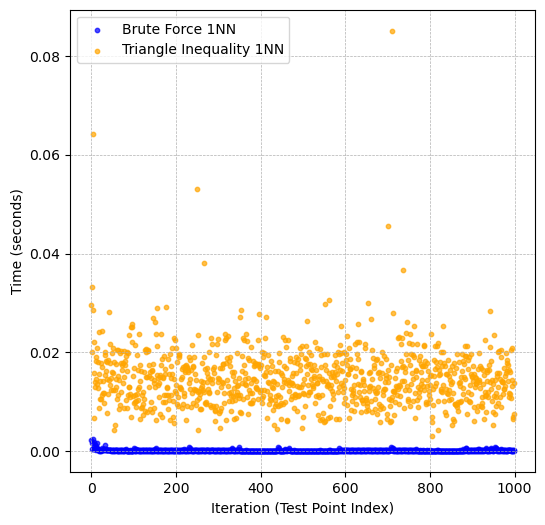

In [117]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Brute Force 1NN
brute_force_times = []
brute_force_predictions = []
for test_instance in tqdm(test_X.values, desc='Brute Force 1NN '):
    start_time = time.time()
    distances = np.linalg.norm(train_X.values - test_instance, axis=1)
    nearest_neighbor_idx = np.argmin(distances)
    prediction = train_Y.iloc[nearest_neighbor_idx]
    brute_force_predictions.append(prediction)
    elapsed_time = time.time() - start_time
    brute_force_times.append(elapsed_time)
brute_force_total_time = sum(brute_force_times)
print(f"Brute Force 1NN Total Time: {brute_force_total_time:.2f} seconds")

# Triangle Inequality 1NN
triangle_inequality_times = []
triangle_inequality_predictions = []
for test_index, test_instance in enumerate(tqdm(test_X.values, desc='Triangle Inequality 1NN ')):
    start_time = time.time()
    d_min = float('inf')
    nearest_neighbor_label = None
    candidate_indices = np.arange(len(train_X.values))

    while candidate_indices.size > 0:
        i = candidate_indices[0]
        candidate_indices = candidate_indices[1:]  # Remove the first element
        train_instance_X = train_X.values[i]
        d_X_candidate = np.linalg.norm(test_instance - train_instance_X)
        lower_bound_radius = d_X_candidate - d_min
        upper_bound_radius = d_X_candidate + d_min

        other_indices = candidate_indices
        d_X_other_candidates = distance_matrix[i, other_indices]
        included_mask = (d_X_other_candidates >= lower_bound_radius) & (d_X_other_candidates <= upper_bound_radius)
        candidate_indices = candidate_indices[included_mask]  # Update candidate indices

        if d_X_candidate < d_min:
            d_min = d_X_candidate
            nearest_neighbor_label = train_Y.iloc[i]

    triangle_inequality_predictions.append(nearest_neighbor_label)
    elapsed_time = time.time() - start_time
    triangle_inequality_times.append(elapsed_time)
triangle_inequality_total_time = sum(triangle_inequality_times)
print(f"Triangle Inequality 1NN Total Time: {triangle_inequality_total_time:.2f} seconds")

plt.figure(figsize=(6, 6))
plt.scatter(range(len(brute_force_times)), brute_force_times, label='Brute Force 1NN', color='blue', alpha=0.7, s=10)
plt.scatter(range(len(triangle_inequality_times)), triangle_inequality_times, label='Triangle Inequality 1NN', color='orange', alpha=0.7, s=10)
plt.xlabel('Iteration (Test Point Index)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# Part 4 - Imbalanced Dataset

**Split the 4000 data into 3000 training and 1000 validation data.** Generate artificially imbalancy in
the training data (e.g. one class is more and more minority) and analyze the impact on the accuracy
on the 1000 test waves (using the best k obtained in 1/). Then, tune k w.r.t. the F-measure using the
validation data and see if this allows to control the accuracy decrease on the test data.

In [40]:
train_df_4, val_df = split_train_test(train_df, .75)
train_df_4.shape

(3000, 22)

In [41]:
train_X = train_df_4[np.arange(0, last_feat)]
train_Y = train_df_4[last_feat]

val_X = val_df[np.arange(0, last_feat)]
val_Y = val_df[last_feat]

In [42]:
test_X = test_X_original.copy()

In [43]:
train_X, train_mean, train_std = standardize(train_X)

test_X = (test_X-train_mean)/train_std

We will implement undersampling and oversampling and compare the two.

**Metrics for comparison**
- Validation F-measure: A higher F-measure indicates better balance between precision and recall.
- Test Accuracy: See which method better controls the accuracy decrease on the imbalanced test set.
- Performance Stability: Consider the consistency of results across multiple runs since both methods can introduce randomness.

**What to look out for?**
- Does oversampling lead to overfitting (e.g., very high precision or recall but lower accuracy on the test set)?
- Does undersampling result in too much data loss, thereby reducing performance?
- Does tuning $k$ alleviate the accuracy drop for one method more effectively than the other?


## Undersampling

In [44]:
def undersample(X,Y,sample_rate,minority_class=np.random.choice([0,1,2])):
    class_indices = Y[Y==minority_class].index
    indices_to_drop = class_indices.to_series().sample(frac=sample_rate)

    X,Y = X.drop(indices_to_drop), Y.drop(indices_to_drop)

    X.reset_index(drop=True,inplace=True)
    Y.reset_index(drop=True,inplace=True)

    return X,Y


In [45]:
def calculate_class_percentage(Y, label):
    return Y[Y==label].shape[0] / Y.shape[0]

In [46]:
minority_class = 0

train_X_under, train_Y_under = undersample(train_X, train_Y, 0.2, minority_class)

print(calculate_class_percentage(train_Y,minority_class))
print(calculate_class_percentage(train_Y_under,minority_class))

0.3293333333333333
0.2819414703783012


In [47]:
def test_sample_rates(sampling_function, train_X, train_Y, test_X, test_Y, sample_rates, target_class, best_k, num_tests=5):
    class_percentage = []
    accuracies = []

    for s_rate in sample_rates:
        test_accuracies = []
        # Run multiple times to cancel out randomness of sampling
        for _ in range(num_tests):
            train_X_sampled, train_Y_sampled = sampling_function(train_X, train_Y, s_rate, target_class)
            accuracy = test_knn(test_X, test_Y, train_X_sampled, train_Y_sampled, best_k)
            test_accuracies.append(accuracy)

        # Calculate the percentage of the class in the dataset
        percentage = calculate_class_percentage(train_Y_sampled, target_class)
        class_percentage.append(percentage)
        # Calculate the mean accuracy over multiple tests
        accuracies.append(np.round(np.mean(test_accuracies), 2))

    return class_percentage, accuracies

In [48]:
classes = [0, 1, 2]
sample_rates = np.arange(0.0,1.01,step=0.1)
all_accuracies = []
all_percentages = []

for c in classes:
    minority_percentage, accuracies = test_sample_rates(undersample, train_X, train_Y, test_X, test_Y, sample_rates, c, best_k)
    all_accuracies.append(accuracies)
    all_percentages.append(minority_percentage)
    print(f'Minimum accuracy - class {c}: {np.min(accuracies)}%')
    print(f'Maximum accuracy - class {c}: {np.max(accuracies)}%\n')

Minimum accuracy - class 0: 61.4%
Maximum accuracy - class 0: 83.7%

Minimum accuracy - class 1: 63.2%
Maximum accuracy - class 1: 84.36%

Minimum accuracy - class 2: 59.1%
Maximum accuracy - class 2: 83.96%



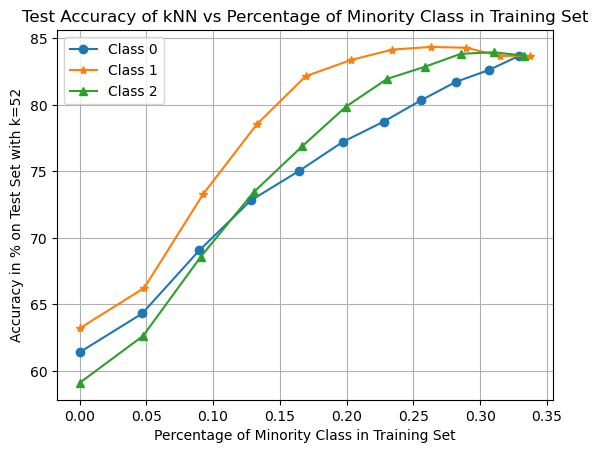

In [49]:
def plot_accuracy_vs_sampling(classes, all_percentages, all_accuracies, class_type, best_k):
    markers = ['o', '*', '^']

    for i, c in enumerate(classes):
        plt.plot(all_percentages[i], all_accuracies[i], marker=markers[i], label=f'Class {c}')

    plt.xlabel(f"Percentage of {class_type} Class in Training Set")
    plt.ylabel(f"Accuracy in % on Test Set with k={best_k}")
    plt.title(f"Test Accuracy of kNN vs Percentage of {class_type} Class in Training Set")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy_vs_sampling(classes, all_percentages, all_accuracies, 'Minority', best_k)

**Key Findings from the Graph:**

1. Completely removing Class 1 from the training data resulted in minimal accuracy loss.
2. Completely removing Class 2 had the most negative impact on model performance.

**Analysis:**

- The test set is randomly sampled from the original dataset.
- The impact of Class 2's removal likely indicates:
    - A slightly higher representation of Class 2 examples in the test set.
        - This will lead to a higher accuracy loss compared to the removal of other classes.

## Oversampling

In [50]:
def oversample(X,Y,sample_rate,majority_class=np.random.choice([0,1,2])):
    class_indices = Y[Y==majority_class].index
    # replace=True -> once an index is selected, this enters it into the pool to be selected again
    # replace=False -> each index can only be chosen once, so you get a subset of the data
    indices_to_duplicate = class_indices.to_series().sample(frac=sample_rate, replace=True)

    # Efficiently create the duplicated rows using pandas directly
    duplicated_X_rows = X.loc[indices_to_duplicate]
    duplicated_Y_rows = Y.loc[indices_to_duplicate]

    # Append duplicated rows to original DataFrames
    X_oversampled = pd.concat([X, duplicated_X_rows], ignore_index=True)
    Y_oversampled = pd.concat([Y, duplicated_Y_rows], ignore_index=True)

    return X_oversampled, Y_oversampled

In [51]:
all_accuracies = []
all_percentages = []

for c in classes:
    majority_percentage, accuracies = test_sample_rates(oversample, train_X, train_Y, test_X, test_Y, sample_rates, c, best_k)
    all_accuracies.append(accuracies)
    all_percentages.append(majority_percentage)
    print(f'Minimum accuracy - class {c}: {np.min(accuracies)}%')
    print(f'Maximum accuracy - class {c}: {np.max(accuracies)}%\n')

Minimum accuracy - class 0: 81.36%
Maximum accuracy - class 0: 84.32%

Minimum accuracy - class 1: 78.14%
Maximum accuracy - class 1: 83.7%

Minimum accuracy - class 2: 82.32%
Maximum accuracy - class 2: 84.24%



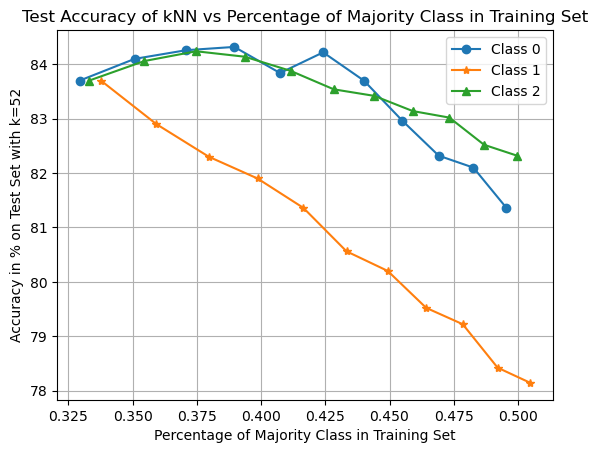

In [52]:
plot_accuracy_vs_sampling(classes, all_percentages, all_accuracies, 'Majority', best_k)

This graph corroborates with the undersampling one:
- When the majority of the dataset is class 2, the test accuracy is the highest of the 3 classes.
    - This again indicates that it is likely that the percentage of class 2 in the test set is the highest.
- Meanwhile, the lowest test accuracy comes from when class 1 is oversampled.
    - This can be seen in both in both the undersampled and oversampled accuracies.
    - Suggests the percentage of class 1 in the test set is the least.

Let's test these theories.

Class 0 percentage in test set: 34.80%
Class 1 percentage in test set: 30.70%
Class 2 percentage in test set: 34.50%


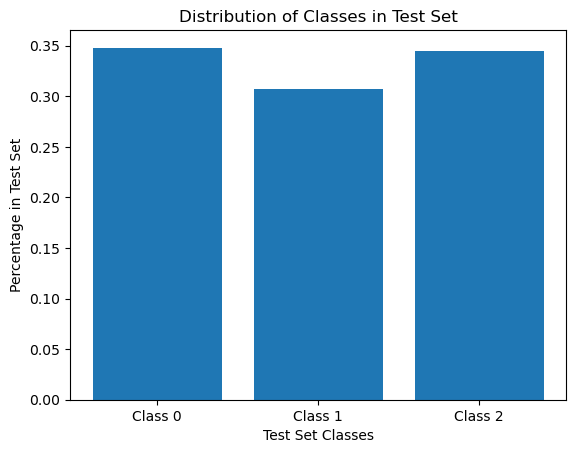

In [53]:
test_distribution = []

for class_label in [0, 1, 2]:
    percentage = calculate_class_percentage(test_Y, class_label)
    test_distribution.append(percentage)
    print(f'Class {class_label} percentage in test set: {percentage:.2%}')

plt.bar(classes, test_distribution)
plt.xticks(classes, [f'Class {c}' for c in classes])
plt.xlabel("Test Set Classes")
plt.ylabel("Percentage in Test Set")
plt.title("Distribution of Classes in Test Set")
plt.show()

The test set is slightly imbalanced, but not as we had suspected.  
- Class 1 is indeed the least represented.
- But class 2 and class 0 have a similar number of examples.

Better performance on class 2 suggests its examples may be:

- More tightly clustered
- More distinct from other classes
- Composed of fewer outliers

The balanced representation between classes 0 and 2 indicates the performance difference comes from the underlying data structure of the examples of class 2 in the test set rather than class imbalance.

## Tuning new k using F-measure

In [54]:
def test_knn_F(test_X, test_Y, train_X, train_Y, k):
    predicted_labels = []
    actual_labels = []

    for idx, x in test_X.iterrows():
        distances = np.sqrt(np.sum((train_X - x)**2, axis=1))
        neighbors_indices = distances.index[np.argsort(distances)][:k]
        neighbors_labels = train_Y.loc[neighbors_indices].values.flatten()
        predicted_label = max(set(neighbors_labels), key=list(neighbors_labels).count)
        actual_label = test_Y.loc[idx].item()

        predicted_labels.append(predicted_label)
        actual_labels.append(actual_label)

    # Calculate F-score for each class
    f_scores = []
    for label in set(actual_labels):
        true_positive = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == a and a == label)
        false_positive = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == label and a != label)
        false_negative = sum(1 for p, a in zip(predicted_labels, actual_labels) if p != label and a == label)

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        f_scores.append(f)

    # Calculate macro-averaged F-score
    overall_f = np.mean(f_scores)

    return overall_f

In [55]:
def tune_k_with_f(sampling_function, train_X, train_Y, val_X, val_Y, sample_rates, target_class, k_range, num_tests=5):
    best_k_values = []
    best_f_scores = []

    for s_rate in sample_rates:
        best_k_for_rate = -1
        best_f_for_rate = -1

        for k in k_range:
            train_X_sampled, train_Y_sampled = sampling_function(train_X, train_Y, s_rate, target_class)
            f = test_knn_F(val_X, val_Y, train_X_sampled, train_Y_sampled, k)

            if f > best_f_for_rate:
                best_f_for_rate = f
                best_k_for_rate = k

        best_k_values.append(best_k_for_rate)
        best_f_scores.append(best_f_for_rate)

    return best_k_values, best_f_scores

In [56]:
def test_with_tuned_k(sampling_function, train_X, train_Y, test_X, test_Y, sample_rates, target_class, best_k_values, num_tests=5):
    class_percentage = []
    accuracies = []

    for i, s_rate in enumerate(sample_rates):
        train_X_sampled, train_Y_sampled = sampling_function(train_X, train_Y, s_rate, target_class)
        accuracy = test_knn(test_X, test_Y, train_X_sampled, train_Y_sampled, best_k_values[i])
        accuracies.append(accuracy)

        percentage = calculate_class_percentage(train_Y_sampled, target_class)
        class_percentage.append(percentage)

    return class_percentage, accuracies


Class 0 as minority:
	Best k values (validation): [2, 2, 2, 2, 4, 2, 2, 2, 2, 9, 9]
	Best F-scores (validation): [0.658 0.655 0.653 0.655 0.624 0.652 0.641 0.546 0.634 0.509 0.506]

Class 1 as minority:
	Best k values (validation): [2, 4, 2, 2, 4, 2, 2, 6, 4, 4, 2]
	Best F-scores (validation): [0.658 0.665 0.682 0.687 0.69  0.696 0.682 0.701 0.685 0.639 0.458]

Class 2 as minority:
	Best k values (validation): [2, 4, 4, 6, 8, 7, 6, 31, 1, 1, 2]
	Best F-scores (validation): [0.658 0.661 0.661 0.67  0.666 0.646 0.645 0.617 0.607 0.538 0.408]


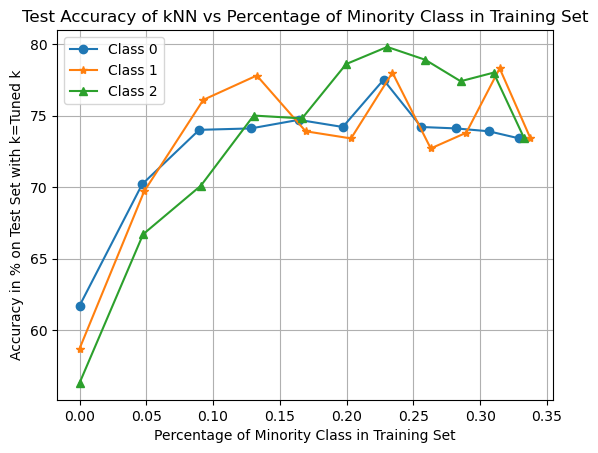

In [57]:
k_range = np.arange(1,60)
sample_rates = np.arange(0.0, 1.1, step=0.1)
classes = [0, 1, 2]

all_tuned_accuracies_under = []
all_percentages_under = []

for c in classes:
    print(f"\nClass {c} as minority:")
    best_k_under, best_f_under = tune_k_with_f(undersample, train_X, train_Y, val_X, val_Y, sample_rates, c, k_range)
    print(f"\tBest k values (validation): {best_k_under}")
    print(f"\tBest F-scores (validation): {np.round(best_f_under, 3)}")

    minority_percentage_under, tuned_accuracies_under = test_with_tuned_k(undersample, train_X, train_Y, test_X, test_Y, sample_rates, c, best_k_under)
    all_tuned_accuracies_under.append(tuned_accuracies_under)
    all_percentages_under.append(minority_percentage_under)

plot_accuracy_vs_sampling(classes, all_percentages_under, all_tuned_accuracies_under, 'Minority', 'Tuned k')


Class 0 as majority:
	Best k values (validation): [2, 10, 6, 4, 9, 8, 6, 5, 10, 6, 14]
	Best F-scores (validation): [0.658 0.661 0.687 0.69  0.675 0.69  0.694 0.697 0.716 0.718 0.692]

Class 1 as majority:
	Best k values (validation): [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
	Best F-scores (validation): [0.658 0.656 0.653 0.656 0.654 0.652 0.652 0.651 0.644 0.651 0.644]

Class 2 as majority:
	Best k values (validation): [2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4]
	Best F-scores (validation): [0.658 0.661 0.657 0.653 0.631 0.66  0.649 0.655 0.642 0.649 0.625]


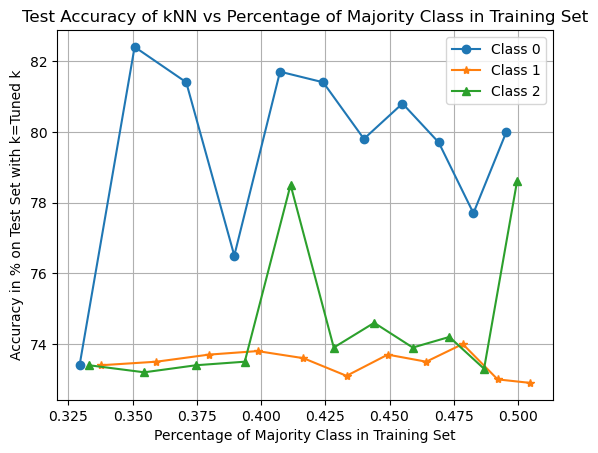

In [58]:
all_tuned_accuracies_over = []
all_percentages_over = []

for c in classes:
    print(f"\nClass {c} as majority:")
    best_k_over, best_f_over = tune_k_with_f(oversample, train_X, train_Y, val_X, val_Y, sample_rates, c, k_range)
    print(f"\tBest k values (validation): {best_k_over}")
    print(f"\tBest F-scores (validation): {np.round(best_f_over, 3)}")

    majority_percentage_over, tuned_accuracies_over = test_with_tuned_k(oversample, train_X, train_Y, test_X, test_Y, sample_rates, c, best_k_over)
    all_tuned_accuracies_over.append(tuned_accuracies_over)
    all_percentages_over.append(majority_percentage_over)

plot_accuracy_vs_sampling(classes, all_percentages_over, all_tuned_accuracies_over, 'Majority', 'Tuned k')